## Clustering

###  set up

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
from scipy.special import gammaln
from scipy.misc import logsumexp
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import random
import collections
from scipy import sparse
import numpy as np
from scipy.special import loggamma 
from numpy import random
import scipy.stats as st 
from math import *
from statistics import *

In [2]:
import time

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import seaborn as sns

### create graph (copy to PGNN original code)(before PGNN)(add to dataset.py)

In [9]:
# 
Data = open('melt_chr1_3000000_3240000_1000p.txt',"r")
next(Data,None)
Graphtype = nx.Graph()
graph = nx.parse_edgelist(Data, delimiter='\t', create_using=Graphtype,
                      nodetype=int, data=(('weight', float),))
feature = np.identity(graph.number_of_nodes())
nodes = list(graph.nodes)

In [5]:
# directly copied 
graphs = []
features = []

Data = open('melt_chr1_3000000_3240000_1000p.txt',"r")
next(Data,None)
Graphtype = nx.Graph()
for _ in range(1):
    graph = nx.parse_edgelist(Data, delimiter='\t', create_using=Graphtype,
                      nodetype=int, data=(('weight', float),))
    graph = nx.convert_node_labels_to_integers(graph)
    feature = np.identity(graph.number_of_nodes())
    graphs.append(graph)
    features.append(feature)

In [ ]:
module load python3.7-anaconda
source activate myenv
python main.py --model PGNN --layer_num 2 --approximate 2 --dataset micro-c --epoch_num 800

### Micro-C data contact map

In [93]:
G_adj = pd.read_csv("adj_chr1_3000000_3240000_1000.csv",sep = ',',index_col = 0)
G_adj_np = G_adj.to_numpy()

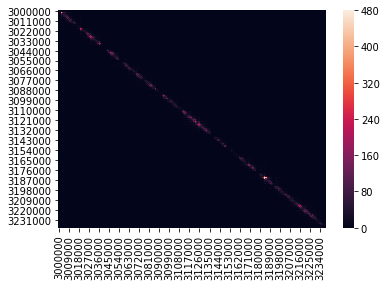

In [101]:
sns.heatmap(G_adj)

##### Note; By the contact map processed from R. It should be like around 13 clusters.

#### First perform k-means clustering or spectral k-means clustering 

### read in embeddings(after PGNN)

In [10]:
G_embed = pd.read_csv("micro_c_G_emb.csv",sep = ',', header=None)
new_index = nodes
G_embed.index = new_index

### k-means clustering

In [11]:
n = 13

In [12]:
k_cluster = KMeans(n_clusters = n, random_state=0).fit(G_embed)
result = k_cluster.fit_predict(G_embed)

### PCA

In [29]:
pca = PCA(n_components = 4)
pca_result = pca.fit_transform(G_embed)
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])
pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]
top_two_comp = pca_df[['pca1','pca2']]

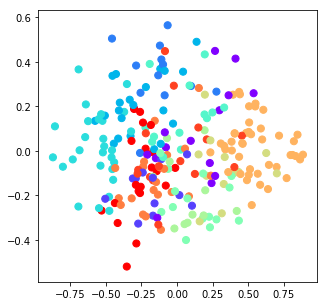

In [28]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(np.unique(result))))
plt.figure(figsize=(5,5))
plt.scatter(top_two_comp['pca1'],top_two_comp['pca2'],s = 50, c = colors[result])

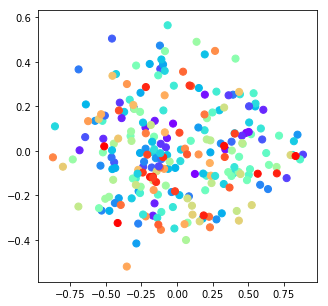

In [78]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(count_in_cluster)))
plt.figure(figsize=(5,5))
plt.scatter(Y[:,0],Y[:,1],s = 50, c = colors[data_assignment])

### PCA dimension reuction

In [15]:
pca = PCA(n_components = 4)
pca_result = pca.fit_transform(G_embed)
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])
pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]
top_two_comp = pca_df[['pca1','pca2']]


In [57]:
Y = pca_df.to_numpy()
N, D = Y.shape

In [16]:
#top_two_comp.insert(loc = 0, column = "cluster",value = result)
#top_two_comp.insert(loc = 0, column = "node",value = new_index)

In [17]:
top_two_comp.to_numpy()

array([[ 0.08392812, -0.20418626],
       [ 0.84806629,  0.07269359],
       [-0.19196691,  0.39035967],
       [ 0.38389311,  0.04113247],
       [ 0.18050442, -0.30421801],
       [ 0.88640761, -0.01706104],
       [-0.64145173,  0.208564  ],
       [ 0.6074968 ,  0.18445893],
       [ 0.27756099, -0.30790559],
       [ 0.1536975 ,  0.28234882],
       [ 0.48718066,  0.08082557],
       [-0.07811484,  0.01584429],
       [-0.5763861 ,  0.13462316],
       [ 0.55049296,  0.19948361],
       [-0.69256812,  0.36592142],
       [ 0.19528434,  0.43321147],
       [-0.06954046, -0.01889886],
       [-0.22193889,  0.10479873],
       [ 0.29840526,  0.18223255],
       [ 0.64032661, -0.17164529],
       [-0.37177801,  0.17510299],
       [-0.31895357, -0.21333455],
       [-0.30211242,  0.19079263],
       [ 0.329125  , -0.14880632],
       [-0.42933796,  0.34509365],
       [ 0.81344802, -0.01851553],
       [-0.01224903, -0.07652961],
       [-0.16957605, -0.00624852],
       [-0.85893807,

In [30]:
Y = top_two_comp.to_numpy()
N, D = Y.shape

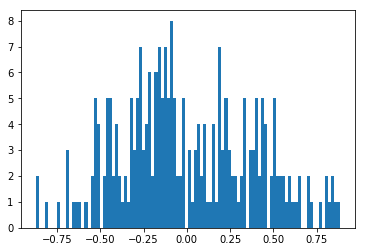

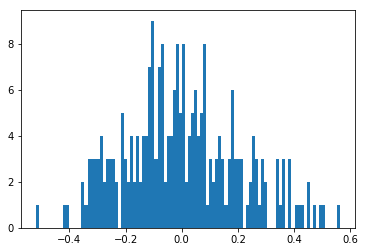

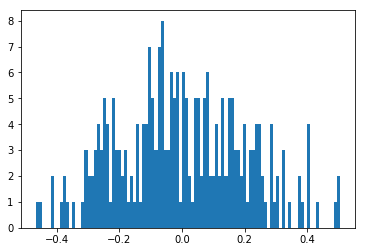

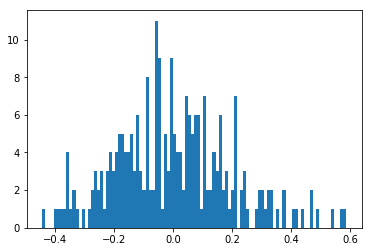

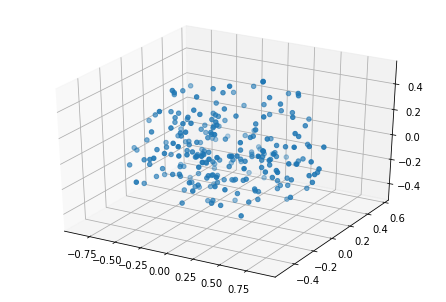

In [58]:
plt.hist(Y[:,0],bins= 100)
plt.show()
plt.hist(Y[:,1],bins = 100)
plt.show()
plt.hist(Y[:,2],bins = 100)
plt.show()
plt.hist(Y[:,3],bins = 100)
plt.show()
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Y[:,0], Y[:,1],Y[:,2])
plt.show()

## Dirichilet Process Gaussian Mixture Model :  Clustering

#### dummy data-2

In [56]:
sizes = [40,40,40,40]
p = [[0.9,0.01,0.01,0.01],
    [0.01,0.9,0.01,0.01],
    [0.01,0.01,0.9,0.01]]
G = nx.generators.community.stochastic_block_model(sizes,p,seed = 42)
labels = np.array(["1"]* 40 + ["2"]* 40 + ["3"]*40 + ["4"]*40)
N = len(G)
n = 4

### Chinese restaurant Process

In [15]:
def Chinese_Restaurant_Process(num_customers,alpha):
    table_assignments = [] # set empty assignment list
    if num_customers > 0:
        table_assignments = [1] # first customer sits at table 1
        next_open_table = 2 # index of the next empty table
    # now generate table assignments for the rest of the customer
    for i in np.arange(num_customers - 1): # iterate over the rest of customers
        if np.random.random() < alpha/(alpha + i): # the probability to choose an unoccupied table
            table_assignments.append(next_open_table)
            next_open_table += 1
        else:
            # Customer sits at an existing table
            # He chooses which table to sit at by giving equal weight to each customer already sitting at a table
            which_table = table_assignments[random.randint(0,len(table_assignments) - 1)]
            table_assignments.append(which_table)
            
    return table_assignments

In [16]:
Chinese_Restaurant_Process(num_customers = 10, alpha = 1)

[1, 2, 1, 2, 2, 1, 3, 1, 1, 1]

### Dirichlet Process Gaussian Mixture Model with CRP prior using Gibbs sampler : with known variance

#### generate synthetic data ( draw from multivariate normal distribution)

In [17]:
X1 = np.random.multivariate_normal([5, 5], np.diag([0.5, 0.5]), size=20)
X2 = np.random.multivariate_normal([8, 8], np.diag([0.5, 0.5]), size=20)
X3 = np.random.multivariate_normal([20, 20], np.diag([0.5, 0.5]), size=10)
X = np.vstack([X1, X2, X3])
N, D = X.shape # X is 50* 2 dataset:every data point is a two-dimensional vector

In [18]:
N, D = X.shape

#### Using block graph

In [ ]:
test_embed = pd.read_csv("test_G_emb.csv",sep = ',', header=None)

In [ ]:
test_1 = pd.read_csv("test_G1_emb.csv",sep = ',', header=None)

In [14]:
# PCA reduction and visualization
def pca_df(x_subset):
    pca = PCA(n_components = 4)
    pca_result = pca.fit_transform(x_subset)
    pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])
    pca_df['pca1'] = pca_result[:,0]
    pca_df['pca2'] = pca_result[:,1]
    pca_df['pca3'] = pca_result[:,2]
    pca_df['pca4'] = pca_result[:,3]
    top_two_comp = pca_df[['pca1','pca2']]
    return top_two_comp

In [ ]:
test_1_pca_2 = pca_df(test_1)
X = test_1_pca_2.to_numpy()
N, D = X.shape

In [ ]:
plt.hist(Y[:,0],bins= 100)
plt.show()

In [ ]:
plt.hist(Y[:,0],bins= 100)
plt.show()
plt.hist(Y[:,1],bins = 100)
plt.show()
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Y[:,0], Y[:,1])
plt.show()

#### parameter setting and initialization

In [ ]:
# GMM params
mu = []             # List of 2x1 vector (mean vector of each gaussian) of note: we have already know it is a two-dimensional vector
sigma = np.eye(D)
precision = np.linalg.inv(sigma)      # Fixed precision matrix for all Gaussians
data_assignment = np.zeros([N], dtype=int)       # Assignments
assignment_matrix = []       # Cluster: binary matrix K * number of data points 
count_in_cluster = []       # Count of each cluster

# prior in the previous Chinese Restaurant Process
alpha = 100   # affect the number of clusters 

# Base distribution prior: N(mu0, prec0)
base_mu = np.ones(D)
base_sigma = np.eye(D)
base_precision = np.linalg.inv(np.eye(D))
G0 = st.multivariate_normal(mean = base_mu, cov = base_sigma)

# Initialize with ONE cluster
assignment_matrix.append(np.ones(N, dtype=int))
data_assignment[:] = 0
count_in_cluster.append(N)
mu.append(G0.rvs()) # draw random samples from a multivariate normal distribution
K = 1
mvn = st.multivariate_normal 

#### Gibbs Sampling

In [ ]:
# Gibbs sampler
for it in range(20):

    # For each data point, draw the cluster assignment
    for i in range(N):
        # Remove assignment from cluster
        # ------------------------------

        ith_assignment = data_assignment[i] # select the ith data point's assignment
        assignment_matrix[ith_assignment][i] = 0 # set the corresponding assignment to zero
        count_in_cluster[ith_assignment] -= 1 # remove the data point from the current cluster

        # If empty, remove cluster
        if count_in_cluster[ith_assignment] == 0:
            # Fix indices
            data_assignment[data_assignment > ith_assignment] -= 1

            # Delete cluster
            del assignment_matrix[ith_assignment]
            del count_in_cluster[ith_assignment]
            del mu[ith_assignment]

            # Decrement cluster count
            K -= 1

        # Draw new assignment zi weighted by CRP prior
        # --------------------------------------------

        probs = np.zeros(K + 1) # probability 
        data_assignment_minus_i = data_assignment[np.arange(len(data_assignment)) != i] # remove the ith data point

        # Probs of joining existing cluster
        for k in range(K):
            data_assignment_minus_i_k = data_assignment_minus_i[data_assignment_minus_i == k].shape[0] # remove all the data points in the kth assignment
            crp = data_assignment_minus_i_k / (N + alpha - 1)
            probs[k] = crp * mvn.pdf(X[i], mu[k], sigma)

        # Probability of creating new cluster
        crp = alpha / (N + alpha - 1)
        likelihood = mvn.pdf(X[i], base_mu, base_sigma + sigma)  # marginal dist. of x
        probs[K] = crp * likelihood

        # Normalize
        probs /= np.sum(probs)

        # Draw new assignment for i
        z = np.random.multinomial(n = 1, pvals = probs).argmax()

        # Update assignment trackers
        if z == K:
            assignment_matrix.append(np.zeros(N, dtype=int))
            count_in_cluster.append(0)
            mu.append(G0.rvs())
            K += 1

        data_assignment[i] = z
        assignment_matrix[z][i] = 1
        count_in_cluster[z] += 1

    for k in range(K):
        Xk = X[data_assignment == k]
        count_in_cluster[k] = Xk.shape[0]
        
        # Covariance of posterior
        lambda_post = base_precision + count_in_cluster[k] * precision
        cov_post = np.linalg.inv(lambda_post)

        # Mean of posterior
        left = cov_post
        right = base_precision @ base_mu + count_in_cluster[k] * precision @ np.mean(Xk, axis=0) # at sign is a matrix multiplication
        mu_post = left @ right

        # Draw new mean sample from posterior
        mu[k] = mvn.rvs(mu_post, cov_post)

#### print out the results

In [ ]:
for k in range(K):
    print('{} data in cluster-{}, mean: {}'.format(count_in_cluster[k], k, mu[k]))

### Collapsed Gibbs Sampler for Dirichilet Process Gaussian Mixture Model with CRP prior : with unknown variance

#### Dimension Reduction

In [88]:
# PCA reduction and visualization
def pca_df3(x_subset):
    pca = PCA(n_components = 4)
    pca_result = pca.fit_transform(x_subset)
    pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])
    pca_df['pca1'] = pca_result[:,0]
    pca_df['pca2'] = pca_result[:,1]
    pca_df['pca3'] = pca_result[:,2]
    pca_df['pca4'] = pca_result[:,3]
    top_two_comp = pca_df[['pca1','pca2','pca3']]
    return top_two_comp

#### Synthetic Graph Data Embedding

In [116]:
test_1 = pd.read_csv("test_G1_emb.csv",sep = ',', header=None)
test_embed_pca_2 = pca_df(test_1)
Y = test_embed_pca_2.to_numpy()
N, D = Y.shape

In [105]:
test_2 = pd.read_csv("test_G2_emb.csv",sep = ',', header=None)
test2_embed_pca_2 = pca_df3(test_2)
Y = test2_embed_pca_2.to_numpy()
N, D = Y.shape

#### Normality checking

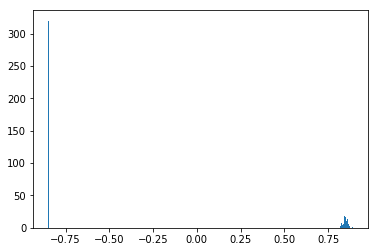

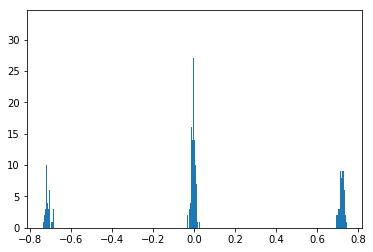

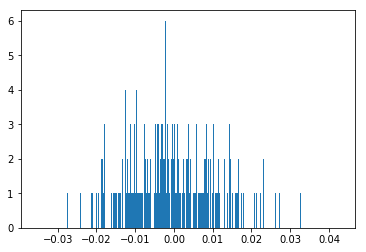

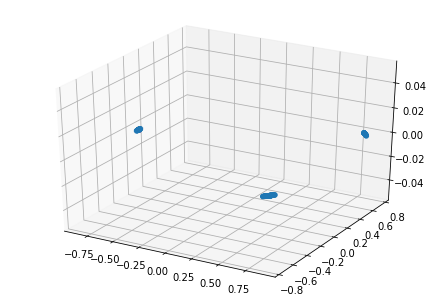

In [91]:
plt.hist(Y[:,0],bins= 1000)
plt.show()
plt.hist(Y[:,1],bins = 1000)
plt.show()
plt.hist(Y[:,2],bins = 1000)
plt.show()
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Y[:,0], Y[:,1])
plt.show()

In [80]:
X1 = np.random.multivariate_normal([5, 5], np.diag([0.5, 0.5]), size=20)
X2 = np.random.multivariate_normal([10, 10], np.diag([0.5, 0.5]), size=20)
X3 = np.random.multivariate_normal([40, 40], np.diag([0.3, 0.3]), size=10)
X4 = np.random.multivariate_normal([50, 50], np.diag([0.6, 0.6]), size=10)
X = np.vstack([X1, X2, X3, X4])
N, D = X.shape # X is 50* 2 dataset:every data point is a two-dimensional vector

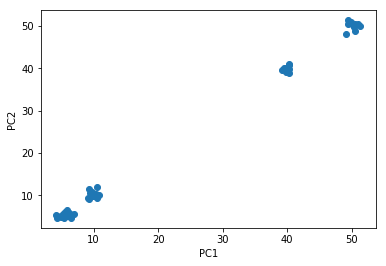

In [81]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

##### Notations:
N: total number of data vectors

D: dimensionality of vectors

$y_i$: data point

$c_i$: parameter assignment of data point

For each step of Gibbs Sampler: $p\left(c_{i}=k | c_{-i}, y, \alpha, \beta\right) \propto p\left(c_{i}=k | c_{-i}, \alpha\right) p\left(y | c_{-i}, c_{i}=k, \beta\right)$

#### Define a multivariate t distribution probability density function

$\frac{\Gamma[(\nu+p) / 2]}{\Gamma(\nu / 2) \nu^{p / 2} \pi^{p / 2}|\mathbf{\Sigma}|^{1 / 2}}\left[1+\frac{1}{\nu}(\mathbf{x}-\boldsymbol{\mu})^{\mathrm{T}} \mathbf{\Sigma}^{-1}(\mathbf{x}-\boldsymbol{\mu})\right]^{-(\nu+p) / 2}$

In [59]:
def multi_student_pdf(x,d,df,mu,sigma):      # pdf of multivariate student'T distribution 
    term_1 = gamma(1. * (d + df) / 2)
    term_2 = gamma(1. * df / 2) * pow(df, d / 2) * pow(pi, d / 2) * pow(np.linalg.det(sigma),1/2)
    term_3 = pow((1 + (1. / df) * np.dot(np.dot((x - mu),np.linalg.inv(sigma)),(x - mu))),  (1. * (d + df)/2))
    return term_1 / (term_2 * term_3)

In [60]:
def log_student_pdf(x,d,df,mu,sigma):      # log pdf of multivariate student'T distribution 
        term_1 = loggamma(1. * (d + df) / 2)
        term_2 = loggamma(1. * df / 2) + (1. * d / 2) * np.log(1. * df) + (1. * d/2) * np.log(np.pi) + (1. / 2) * np.linalg.det(sigma)
        term_3 = (1. * (d + df) / 2) * np.log(1 + (1. / df) * np.dot(np.dot((x - mu),np.linalg.inv(sigma)),(x - mu)))
    
        return term_1 - term_2 - term_3

#### Sample from a multivariate t distribution

In [61]:
def multivariate_t_rvs(mu, S, df, n):
    '''
    m : mu
    S : covariance  matrix
    df :
    n : number of observations, return random array will be (n, len(m))

    '''
    m = np.asarray(m)
    d = len(m)
    if df == np.inf:
        x = 1.
    else:
        x = np.random.chisquare(df, n)/df
    z = np.random.multivariate_normal(np.zeros(d),S,(n,))
    return m + z/np.sqrt(x)[:,None]   # same output format as random.multivariate_normal

#### Posterior Predictive for $y_i$

$\begin{aligned} \mu_{N} &=\frac{\lambda_{0} \mu_{0}+N \bar{y}}{\lambda_{N}} \\ \lambda_{N} &=\lambda_{0}+N \\ \nu_{N} &=\nu_{0}+N \end{aligned}$

$\begin{array}{c}{S_{N}=S_{0}+C+\frac{\lambda_{0} N}{\lambda_{N}}\left(\bar{y}-\mu_{0}\right)\left(\bar{y}-\mu_{0}\right)^{T}}\end{array}$

$C=\sum_{i=1}^{N}\left(y_{i}-\bar{y}\right)\left(y_{i}-\bar{y}\right)^{T}$

$p\left(y_{i} | y, \beta\right) \quad=\quad t_{v_{N-1}-D+1}\left(y_{i} | \mu_{N-1}, \frac{S_{N-1}\left(\lambda_{N-1}+1\right)}{\lambda_{N-1}\left(v_{N-1}-D+1\right)}\right)$

In [62]:
# Here we should input the data without the ith data point
def posterior_predictive(mu_0,S_0,data,x_new): # t  degree of freedom nu = nu_n-d+1
    """
    alpha: nu
    beta: lambda
    m: mu 
    b: S
    sigma_bar:C
    """
    
    d = D
    N = len(data)
        
    nu_N = nu_0 + N 
    data_bar = np.mean(data,axis = 0) 
                            
    lambda_N = lambda_0 + N
    mu_N = (lambda_0 * mu_0 + N * data_bar) / lambda_N         
                
    C = (data - mu_0).transpose().dot(data - mu_0)                
    S_N = S_0 + C + lambda_0 / lambda_N * (data_bar - mu_0).transpose().dot(data_bar - mu_0)
     
        
    Sigma = S_N * (lambda_N + 1)/(lambda_N * (nu_N - d + 1))
        
    df = nu_N - d + 1
        
    return multi_student_pdf(x_new, d, df, mu_N, Sigma)

In [63]:
def log_posterior_predictive(mu_0,S_0,data,x_new): # t  degree of freedom nu = nu_n-d+1
    """
    alpha: nu
    beta: lambda
    m: mu 
    b: S
    sigma_bar:C
    """
    
    d = D
    N = len(data)
        
    nu_N = nu_0 + N 
    data_bar = np.mean(data,axis = 0) 
                            
    lambda_N = lambda_0 + N
    mu_N = (lambda_0 * mu_0 + N * data_bar) / lambda_N         
                
    C = (data - mu_0).transpose().dot(data - mu_0)                
    S_N = S_0 + C + lambda_0 / lambda_N * (data_bar - mu_0).transpose().dot(data_bar - mu_0)
     
        
    Sigma = S_N * (lambda_N + 1)/(lambda_N * (nu_N - d + 1))
        
    df = nu_N - d + 1
        
    return log_student_pdf(x_new, d, df, mu_N, Sigma)

#### Posterior for $\mu$ and $\Sigma$

$\begin{aligned} \mu | \mu_{n}, \lambda_{n}, \Sigma & \sim N\left(\mu | \mu_{n}, \frac{1}{\lambda_{n}} \Sigma\right)\end{aligned}$ 

$\begin{aligned}\Sigma | S_{n}, \nu_{n} & \sim W^{-1}\left(\Sigma | S_{n}, \nu_{n}\right) \end{aligned}$

##### sample from joint distribution


In [64]:
def posterior(data,mu_0,S_0): 
    """
    alpha: nu
    beta: lambda
    m: mu 
    b: S
    sigma_bar:C
    """ 
         
    N = len(data)        
    data_bar = np.mean(data,axis = 0) 
    
    
    # update cov  
    lambda_N = lambda_0 + N
    nu_N = nu_0 + N  
    C = (data - data_bar).transpose().dot(data - data_bar)                
    S_N = S_0 + C + N * lambda_0 / lambda_N * (data_bar - mu_0).transpose().dot(data_bar - mu_0)
         
    cov_new = st.invwishart.rvs(nu_N,S_N)
    
    
                
    # update mean               
    lambda_N = lambda_0 + N
    mu_N = (lambda_0 * mu_0 + N * data_bar) / lambda_N        
    mean_new = st.multivariate_normal.rvs(mu_N,cov_new / lambda_N)
               

                
    #mean_chain.append(mean_new)
    #cov_chain.append(cov_new)
                         
    #mean = mean_new
    #cov = cov_new 
    result = [mean_new,cov_new]
    return result  


#### Prior for $\mu$ and $\Sigma$

$\begin{aligned} \mu | \mu_{0}, \lambda_{0}, \Sigma & \sim N\left(\mu | \mu_{0}, \frac{1}{\lambda_{0}} \Sigma\right)\end{aligned}$ 

$\begin{aligned}\Sigma | S_{0}, \nu_{0} & \sim W^{-1}\left(\Sigma | S_{0}, \nu_{0}\right) \end{aligned}$

#### Cluster and Parameter Initialization

In [71]:
# parameters to estimate
mu = []             # List of 2x1 vector (mean vector of each gaussian) of note: we have already know it is a two-dimensional vector
cov = []

# prior for mu and sigma
mu_0 = np.mean(Y,axis=0)
S_0 = np.eye(D) # priori in inv-wishart distribution

mu.append(np.mean(Y,axis=0)) # initial mean for the cluster
cov.append(S_0) # initial covariance for the cluster


# other 2 parameters in NIW
lambda_0 = 0.01
nu_0 = 4

# prior in the previous CRP
alpha = 100

# Initialize ci for every data vector yi to a random table.
data_assignment = np.zeros([N], dtype=int)       
assignment_matrix = []       
count_in_cluster = []       

# Initialize with ONE cluster
K = 1
assignment_matrix.append(np.ones(N, dtype=int))
data_assignment[:] = 0
count_in_cluster.append(N)

# iterations specification
T = 10

#### Collapsed Gibbs Sampler 

Update assignment ($C_i$) and parameters ($\mu$ and $\Sigma$) iteratively 

In [69]:
for it in range(T): # iterations 
    # --------------------------------------------------------
    # Sample from full conditional of assignment from CRP prior (1 step)
    # --------------------------------------------------------
        
    # For each data point, draw the cluster assignment
    for i in range(N): # N data points
        
        # -----------------------------------
        # remove assignment from cluster
        # -----------------------------------
        ith_assignment = data_assignment[i] # get which cluster ith data point belongs to # ith_assignment: the id of the cluster
        assignment_matrix[ith_assignment][i] = 0  # remove the data point from the cluster
        count_in_cluster[ith_assignment] -= 1 # therefore the count in correspongding cluster minus 1
        
        if count_in_cluster[ith_assignment] == 0: # if the number of the data points in the cluster is zero 
            data_assignment[data_assignment > ith_assignment] -= 1 # Update indices by -1
            
            del assignment_matrix[ith_assignment] # delete this cluster
            del count_in_cluster[ith_assignment] # delete this cluster
            del mu[ith_assignment] # delete the corresponding mu
            del cov[ith_assignment] # delete the corresponding cov
            
            K -= 1 # the number of the cluster is down to K - 1

        # -----------------------------------
        # Probability Calculation
        # Draw new assignment zi weighted by CRP prior
        # -----------------------------------
        
        # allocate space for the probability for K + 1 clusters
        probs = np.zeros(K + 1)
        # remove the ith data point 
        data_assignment_minus_i = data_assignment[np.arange(len(data_assignment)) != i] # remove the ith data point

        # -----------------------------------
        # Probs of joining existing cluster
        # -----------------------------------
        for k in range(K):
            # the number all the data points in the kth assignment
            data_assignment_minus_i_k = data_assignment_minus_i[data_assignment_minus_i == k].shape[0] 
            # the data point in the cluster k (excluding i)
            data_K_minus_i = np.delete(X,i,0)[data_assignment_minus_i == k]
            # the data point in the cluster k (including i)
            data_k = X[data_assignment == k]
            # extract the mu and S from their list
            mu_k = mu[k] 
            S_k = cov[k]                 
            # prior 
            crp = data_assignment_minus_i_k / (N + alpha - 1)
            # likelihood to be in an exisitng cluster   (mu_0,S_0,data,x_new)
            likelihood_exist = posterior_predictive(mu_k,S_k,data_K_minus_i,X[i])
            # probability without normalization
            probs[k] = crp * likelihood_exist
       
        # -----------------------------------
        # Probability of creating new cluster
        # -----------------------------------
        
        # prior
        crp = alpha / (N + alpha - 1)    
        # likelihood to be in a new cluster
        likelihood_new =  multi_student_pdf(X[i],D, nu_0 - D + 1,mu_0,S_0) 
        # probability without normalization
        probs[K] = crp * likelihood_new  
        
        # Normalize
        probs /= np.sum(probs)
        # Draw new assignment for i(when the probability goes to max we find the corresponding cluster)
        z = np.random.multinomial(n = 1, pvals = probs).argmax()
        
        # -----------------------------------
        # Update assignment
        # -----------------------------------           
        
        # Update assignment trackers(if we had a new cluster)
        if z == K:
            assignment_matrix.append(np.zeros(N, dtype=int))
            count_in_cluster.append(0)
            mu.append(mu_0)
            cov.append(S_0)
            K += 1
        
        # Update assignment trackers(if we had new data point in existing cluster)
        data_assignment[i] = z
        assignment_matrix[z][i] = 1
        count_in_cluster[z] += 1
        
        
        # -------------------------------------------------
        # Sample from full conditional of cluster parameter
        # -------------------------------------------------

        # -----------------------------------
        # Update mu and S in cluster
        # -----------------------------------
        
        # posterior is NIW
        for k in range(K):
            data_k = X[data_assignment == k]
            
            # update mu
            mu[k] = posterior(data_k,mu_0,S_0)[0]
            # update sigma
            cov[k] = posterior(data_k,mu_0,S_0)[1]
    if  T / (it+1) == 4:
        print("- 25% finished! -")
    if  T / (it+1) == 2:
        print("- 50% finished! -")
    if it == T-1:
        print("- finished! -")

NameError: name 'X' is not defined

In [88]:
for k in range(K):
    print('{} data in cluster-{}'.format(count_in_cluster[k], k))

10 data in cluster-0
20 data in cluster-1
10 data in cluster-2
20 data in cluster-3


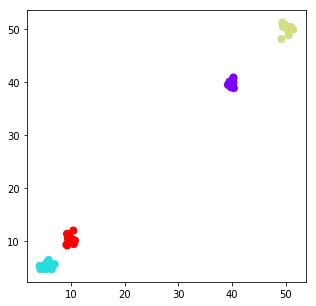

In [89]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(count_in_cluster)))
plt.figure(figsize=(5,5))
plt.scatter(X[:,0],X[:,1],s = 50, c = colors[data_assignment])

#### Collapsed Gibbs Sampler (log likelihood)

In [72]:
for it in range(T): # iterations 
    # --------------------------------------------------------
    # Sample from full conditional of assignment from CRP prior (1 step)
    # --------------------------------------------------------
        
    # For each data point, draw the cluster assignment
    for i in range(N): # N data points
        
        # -----------------------------------
        # remove assignment from cluster
        # -----------------------------------
        ith_assignment = data_assignment[i] # get which cluster ith data point belongs to # ith_assignment: the id of the cluster
        assignment_matrix[ith_assignment][i] = 0  # remove the data point from the cluster
        count_in_cluster[ith_assignment] -= 1 # therefore the count in correspongding cluster minus 1
        
        if count_in_cluster[ith_assignment] == 0: # if the number of the data points in the cluster is zero 
            data_assignment[data_assignment > ith_assignment] -= 1 # Update indices by -1
            
            del assignment_matrix[ith_assignment] # delete this cluster
            del count_in_cluster[ith_assignment] # delete this cluster
            del mu[ith_assignment] # delete the corresponding mu
            del cov[ith_assignment] # delete the corresponding cov
            
            K -= 1 # the number of the cluster is down to K - 1

        # -----------------------------------
        # Probability Calculation
        # Draw new assignment zi weighted by CRP prior
        # -----------------------------------
        
        # allocate space for the probability for K + 1 clusters
        probs = np.zeros(K + 1)
        # remove the ith data point 
        data_assignment_minus_i = data_assignment[np.arange(len(data_assignment)) != i] # remove the ith data point

        # -----------------------------------
        # Probs of joining existing cluster
        # -----------------------------------
        for k in range(K):
            # the number all the data points in the kth assignment
            data_assignment_minus_i_k = data_assignment_minus_i[data_assignment_minus_i == k].shape[0] 
            # the data point in the cluster k (excluding i)
            data_K_minus_i = np.delete(Y,i,0)[data_assignment_minus_i == k]
            # the data point in the cluster k (including i)
            data_k = Y[data_assignment == k]
            # extract the mu and S from their list
            mu_k = mu[k] 
            S_k = cov[k]                 
            # prior 
            log_crp = np.log(data_assignment_minus_i_k / (N + alpha - 1))
            # likelihood to be in an exisitng cluster   (mu_0,S_0,data,x_new)
            log_likelihood_exist = log_posterior_predictive(mu_k,S_k,data_K_minus_i,Y[i])
            # probability without normalization
            probs[k] = log_crp +  log_likelihood_exist
       
        # -----------------------------------
        # Probability of creating new cluster
        # -----------------------------------
        
        # prior
        log_crp = np.log(alpha / (N + alpha - 1))    
        # likelihood to be in a new cluster
        log_likelihood_new =  log_student_pdf(Y[i],D, nu_0 - D + 1,mu_0,S_0) 
        # probability without normalization
        probs[K] = log_crp + log_likelihood_new  
        
        
        # log to exp
        probs = np.exp(np.array(probs))
        # Normalize
        probs /= np.sum(probs)
        # Draw new assignment for i(when the probability goes to max we find the corresponding cluster)
        z = np.random.multinomial(n = 1, pvals = probs).argmax()
        
        # -----------------------------------
        # Update assignment
        # -----------------------------------           
        
        # Update assignment trackers(if we had a new cluster)
        if z == K:
            assignment_matrix.append(np.zeros(N, dtype=int))
            count_in_cluster.append(0)
            mu.append(mu_0)
            cov.append(S_0)
            K += 1
        
        # Update assignment trackers(if we had new data point in existing cluster)
        data_assignment[i] = z
        assignment_matrix[z][i] = 1
        count_in_cluster[z] += 1
        
        
        # -------------------------------------------------
        # Sample from full conditional of cluster parameter
        # -------------------------------------------------

        # -----------------------------------
        # Update mu and S in cluster
        # -----------------------------------
        
        # posterior is NIW
        for k in range(K):
            data_k = Y[data_assignment == k]
            
            # update mu
            mu[k] = posterior(data_k,mu_0,S_0)[0]
            # update sigma
            cov[k] = posterior(data_k,mu_0,S_0)[1]
    if it % 10 == 0:
        print(it,"iterations")
    if it == T-1:
        print("- finished! -")

0 iterations
- finished! -


In [77]:
qq = 0
for k in np.arange(K):
    qq += count_in_cluster[k]
qq

240

In [74]:
for k in range(K):
    print('{} data in cluster-{}'.format(count_in_cluster[k], k))

1 data in cluster-0
1 data in cluster-1
1 data in cluster-2
1 data in cluster-3
2 data in cluster-4
1 data in cluster-5
2 data in cluster-6
1 data in cluster-7
3 data in cluster-8
1 data in cluster-9
2 data in cluster-10
1 data in cluster-11
1 data in cluster-12
2 data in cluster-13
1 data in cluster-14
1 data in cluster-15
1 data in cluster-16
2 data in cluster-17
2 data in cluster-18
1 data in cluster-19
1 data in cluster-20
1 data in cluster-21
1 data in cluster-22
1 data in cluster-23
1 data in cluster-24
1 data in cluster-25
1 data in cluster-26
1 data in cluster-27
1 data in cluster-28
1 data in cluster-29
1 data in cluster-30
1 data in cluster-31
4 data in cluster-32
3 data in cluster-33
1 data in cluster-34
2 data in cluster-35
1 data in cluster-36
3 data in cluster-37
1 data in cluster-38
2 data in cluster-39
1 data in cluster-40
1 data in cluster-41
2 data in cluster-42
2 data in cluster-43
3 data in cluster-44
3 data in cluster-45
1 data in cluster-46
2 data in cluster-47
1 

In [75]:
len(count_in_cluster)

180

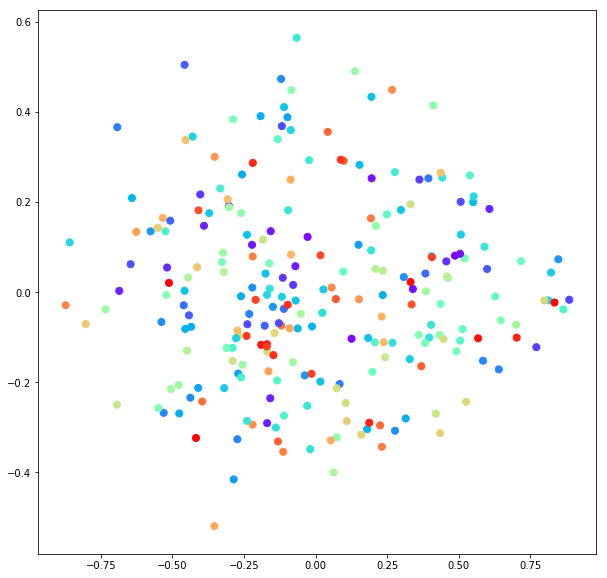

In [76]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, len(count_in_cluster)))
plt.figure(figsize=(10,10))
plt.scatter(Y[:,0],Y[:,1],s = 50, c = colors[data_assignment])

### Variational Bays(EM algorithm)

In [219]:
import numpy as np
import scipy.sparse as sp
from scipy.special import psi, gammaln
import sys

$\begin{aligned}\alpha \sim \Gamma(1, 1)\end{aligned}$

$\begin{aligned}V \sim \beta(1, 1)\end{aligned}$

$\begin{aligned}C \sim SBP(V)\end{aligned}$

$\begin{aligned} \mu \sim N(0, I) \end{aligned}$

$\begin{aligned} \tau \sim \gamma(1, 1) \end{aligned}$

$\begin{aligned} X \sim N(\mu, \tau^{-1}I_p) \end{aligned}$

$\begin{aligned} q(v_t) \sim \beta(vt | \gamma_t, 1,\gamma_t,2) \end{aligned}$

$\begin{aligned} q(c_t) \sim Discrete(Z_n | \phi_n) \end{aligned}$

$\begin{aligned} q(\mu_t) \sim N(mean_mu,nglambda) \end{aligned}$

$\begin{aligned} q(\tau_t) \sim \gamma(a_{\tau},b_{\tau}) \end{aligned}$



#### specify the prior distribution p(v),p(mu),p(tau)

In [ ]:
p_v = np.random.beta(1,1)
p_mu = np.random.normal(np.zeros(N),np.eye(N))

#### ELBO: Evidence Lower Bound on the log marginal likelihood

#### Try to minimize:

$\mathrm{D}\left(q_{\nu}(\mathrm{w}) \| p(\mathrm{w} | \mathrm{x}, \theta)\right)=\mathrm{E}_{q}\left[\log q_{\nu}(\mathrm{W})\right]-\mathrm{E}_{q}[\log p(\mathrm{W}, \mathrm{x} | \theta)]+\log p(\mathrm{x} | \theta)$

#### Which is equivalent to minimize:
$\log p(\mathbf{x} | \theta) \geq \mathrm{E}_{q}[\log p(\mathbf{W}, \mathbf{x} | \theta)]-\mathrm{E}_{q}\left[\log q_{\nu}(\mathbf{W})\right]$

$\begin{aligned} \log p(\mathbf{x} | \alpha, \lambda) \geq & \mathrm{E}_{q}[\log p(\mathbf{V} | \alpha)]+\mathrm{E}_{q}\left[\log p\left(\boldsymbol{\eta}^{*} | \lambda\right)\right] \\ &+\sum_{n=1}^{N}\left(\mathrm{E}_{q}\left[\log p\left(Z_{n} | \mathbf{V}\right)\right]+\mathrm{E}_{q}\left[\log p\left(x_{n} | Z_{n}\right)\right]\right) \\ &-\mathrm{E}_{q}\left[\log q\left(\mathbf{V}, \boldsymbol{\eta}^{*}, \mathbf{Z}\right)\right] \end{aligned}$

#### By mean-field theory the last term can be factorized:
    
$    q\left(\mathbf{v}, \boldsymbol{\eta}^{*}, \mathbf{z}\right)=\prod_{t=1}^{T-1} q_{\gamma_{t}}\left(v_{t}\right) \prod_{t=1}^{T} q_{\tau_{t}}\left(\eta_{t}^{*}\right) \prod_{n=1}^{N} q_{\phi_{n}}\left(z_{n}\right)$

#### Variational Bays(Sklearn)

In [ ]:
from sklearn import mixture
import itertools
from scipy import linalg
import matplotlib as mpl

In [ ]:
dpgmm = mixture.BayesianGaussianMixture(n_components = 5,covariance_type = "full",weight_concentration_prior_type='dirichlet_process')

In [ ]:
dpgmm.fit_predict(Y)

In [ ]:
dpgmm.fit_predict(Y)

In [ ]:
def plot_results(X, Y, means, covariances, index, title):
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y == i):
            continue
        plt.scatter(X[Y == i, 0], X[Y == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
#         angle = np.arctan(u[1] / u[0])
#         angle = 180. * angle / np.pi  # convert to degrees
#         ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
#         ell.set_clip_box(splot.bbox)
#         ell.set_alpha(0.5)
#         splot.add_artist(ell)

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])

In [ ]:
plot_results(Y, dpgmm.predict(Y), dpgmm.means_, dpgmm.covariances_, 1,
             "Bayesian Gaussian mixture models with a Dirichlet process prior")

In [ ]:
plot_results(Y, dpgmm.predict(Y), dpgmm.means_, dpgmm.covariances_, 1,
             "Bayesian Gaussian mixture models with a Dirichlet process prior")

# For future reference

In [ ]:
# plt.scatter(top_two_comp['pca1'], top_two_comp['pca2'], c = result, s = 10, cmap='viridis')
# #centers = k_cluster.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
# node_cluster = [[] for _ in range(n)]
# for index in np.arange(G_embed.shape[0]):
#     for i in np.arange(n):
#         if G_embed.iloc[index,1] == i:
#             node_cluster[i].append(G_embed.iloc[index,0])

In [ ]:
            """
            Np = len(data_k) 
            Np_minus_1 = Np - 1
            
            lambda_N = lambda_0 + Np
            lambda_N_minus_1 = lambda_0 + Np_minus_1
            
            nu_N = nu_0 + Np
            nu_N_minus_1 = nu_0 + Np_minus_1
            
            
            mu_N = (lambda_0 * mu_0 + Np * Y_bar) / lambda_N
            
            C = 0
            C_minus_1 = 0
            for l in np.arange(Np):
                C = C + np.dot((data_k[l] - Y_bar),np.transpose(data_k[l] - Y_bar))                   
            for j in np.arange(Np_minus_1):
                C_minus_1 = C_minus_1 + np.dot((data_K_minus_i[j] - Y_bar),np.transpose(data_K_minus_i[j] - Y_bar))
            
            S_N = S_0 + C + lambda_0 * Np / lambda_N * np.dot((Y_bar - mu_0),np.transpose(Y_bar - mu_0))
            S_N_minus_1 = S_0 + C_minus_1 + lambda_0 * Np_minus_1 / lambda_N_minus_1 * np.dot((Y_bar - mu_0),np.transpose(Y_bar - mu_0))
        
            posterior_predictive = mvt(D,S_N,S_N_minus_1,lambda_N,lambda_N_minus_1,nu_0,nu_N,nu_N_minus_1) 
            
            N1 = len(data_k) - 1
            lambda_N1 = lambda_0 + N1
            nu_N1 = nu_0 + N1
            mu_N1 = (lambda_0 * mu_0 + N1 * Y_bar) / lambda_N1
            C1 = 0
            for j in np.arange(N1):
                C1 = C1 + np.dot((data_K_minus_i[j] - Y_bar),np.transpose(data_K_minus_i[j] - Y_bar))
                #print(C1)
            S_N1 = S_0 + C1 + lambda_0 * N1 / lambda_N1 * np.dot((Y_bar - mu_0),np.transpose(Y_bar - mu_0))
            
            posterior_predictive = multivariate_t_distribution(Y[i],
                                                               mu_N1,
                                                               S_N1 * (lambda_N1 + 1) / (lambda_N1 * (nu_N1 - D + 1)),
                                                               nu_N1 - D + 1,
                                                               D)

            """
    
        """                                       
        lambda_1 = lambda_0 + 1
        nu_1 = nu_0 + 1
        C = np.dot((Y[i] - Y_bar),np.transpose(Y[i] - Y_bar))
        
        S_1 = S_0 + C + lambda_0 * 1/lambda_1 * np.dot((Y_bar - mu_0),np.transpose(Y_bar - mu_0))
        mu_1 = (lambda_0 * mu_0 + Y_bar) / lambda_1
        """

### Distance-Dependent Chinese Restaurant Process

#### dirichilet likelihood 

In [ ]:
# def dirichlet_likelihood(Xp, alpha):
#     if len(Xp.shape) == 2: 
#         X = sum(Xp)
#     else:
#         X = Xp
#     idx = np.where(X != 0) # or raise error in gamma part
#     log_likelihood = gammaln(len(X) * alpha) - len(idx) * gammaln(alpha) + (alpha - 1) * sum(log(X))
#     return log_likelihood

#### l2 norm

In [ ]:
#the type of the input is a pandas dataframe, therefore we need to use iloc and values to get array
# def l2norm_distance(obs,i,j):
#     return np.linalg.norm(obs.iloc[i,].values - obs.iloc[j,].values)

In [ ]:
# D_matrix = np.zeros((len(G_embed),len(G_embed)))

In [ ]:
# for i in np.arange(len(G_embed)):
#     for j in np.arange(len(G_embed)):
#         D_matrix[i,j] = l2norm_distance(G_embed,i,j)

In [ ]:
# D_matrix

In [ ]:
# np.savetxt("D_matrix.csv", D_matrix, delimiter=",")

#### dacay function (use window-decay for network data)

In [ ]:
# # only consider customer at most  a from he current customer

# # window_decay function 
# def window_decay(d,a = 1):
#     if abs(d) <= a and d >= 0:
#         return 1;
#     else:
#         return 0;

# # exponential_decay function
# def exponential_decay(d,a = 1):
#         return exp(-d / a);
    
# # logistic_decay function
# def exponential_decay(d,a = 1):
#         return exp(-d + a)/(1 + exp(-d + a));


In [ ]:
# # initialize link dictionary
# def initial_dict(G_embed):
#     links_dict = dict.fromkeys(i for i in G_embed.index.tolist())
#     return links_dict 

In [ ]:
# G_embed_dict = initial_dict(G_embed)

In [ ]:
# def get_links(i,links,):
#     """
# #     assume we have the customer assignment, that is we know between which customers there exist links
# #     we can create a dictionary to save the links and update it
#     """
    
    

In [ ]:
# # ddcrp main function
# def ddcrp_infer(obs = G_embd, lhood_fn,distance,decay,n-iter,alpha = 0.2):
    
#     # 
#     n = len(obs)
#     # links_dict = dict.fromkeys(i for i in obs.index.tolist())
    
#     cluster = np.zeros(n)
#     link = np.zeros(n)
#     prior = np.random.random(n*n).reshape((n,n))
#     likelihood = map(lambda x: lhood_fn(obs[np.where(cluster == x)]) , cluster)
    
    
    
#     # prior for each customer
#     for i in range(0,n):
#         for j in range(0,n):
#             if ti == j:
#                 apdarior[i][j] == np.log(alpha)
#             else:
#                 prior[i][j] == np.log(window_decay(l2norm_distance(i,j)))
                
#     for i in np.arange(n_iter):
#         print(i," the iteration")
#         obs_likelihood = 0
#         # remove the ith link
#         for i in np.arange(n):
#             old_link = link[i] # select initial links
#             old_cluster = cluster[old_link]
#             cluster[i] = i
#             link[i] = i
#             linked = get_linked(i,link)
#             cluster[linked] = i
            
#             if old_cluster not in linked:
#                 idx = 
    
    

In [ ]:
# def ddCRP_function(D, adj_list, init_c, gt_z, num_passes, 
#           alpha, kappa, nu, sigsq, stats_interval, verbose):
#     """
#     D: connectivity matrix D
#     adj_list: spatial adjacency 
#     init_c: An initialization of the voxel links
#     and a ground truth parcellation gt_z (for comparison) can optionally
#     """
#     map_z =  np.zeros(np.shape(D)[0])
#     stats = {'times':[], 'lp':[], 'NMI':[], 'K':[], 'z':[], 'c':[]}
    
#     hyp = ComputeCachedLikelihoodTerms(kappa, nu, sigsq)
#     num_el = len(adj_list)
    
#     # Generate random initialization if not specified
#     if init_c.size == 0:
#         c = np.zeros(num_el)
#         for i in range(num_el):
#             neighbors = np.concatenate((adj_list[i], i),axis=1) 
#             c[i] = neighbors[rd.randint(1,len(neighbors))]
#     else:
#         c = init_c
    
#     # Initialize spatial connection matrix
#     G = sparse.coo_matrix((np.ones(num_el),(np.arange(num_el),c)),
#                             shape=(num_el,num_el))
#     K, z, parcels = ConnectedComp(G)

#     sym = CheckSymApprox(D)
#     curr_lp = FullProbabilityddCRP(D, c, parcels, alpha, hyp, sym)
    
#     max_lp = -float('inf')
#     steps = 0
#     t0 = time.clock()
    
#     for curr_pass in range(num_passes):
#         order = np.random.permutation(num_el)   # Visit elements randomly
        
#         for i in order:
#             if curr_lp > max_lp:
#                 max_lp = curr_lp
#                 map_z = z
            
#             if steps % stats_interval == 0:
#                 stats = UpdateStats(stats, t0, curr_lp, K, z, c, steps, gt_z,
#                                     map_z, verbose);
        
#             # Compute change in log-prob when removing the edge c_i
#             CooModifyRow(G, i, -1)
#             if c[i] == i:
#                 # Removing self-loop, parcellation won't change
#                 rem_delta_lp, z_rem, parcels_rem = -math.log(alpha), z, parcels
#             else:
#                 K_rem, z_rem, parcels_rem = ConnectedComp(G)
#                 if K_rem != K:
#                     # We split a cluster, compute change in likelihood
#                     rem_delta_lp = -LikelihoodDiff(D, parcels_rem, z_rem[i],z_rem[c[i]], hyp, sym)
#                 else:
#                     rem_delta_lp = 0

#             # Compute change in log-prob for each possible edge c_i
#             adj_list_i = adj_list[i]
#             lp = np.zeros((len(adj_list_i)+1))
#             lp[len(adj_list_i)] = math.log(alpha)
#             cached_merge = -1*np.ones(len(adj_list_i), dtype=np.int32)
#             for n_ind in range(len(adj_list_i)):
#                 n = adj_list_i[n_ind]
#                 if z_rem[n] == z_rem[c[i]]:
#                     # Just undoing edge removal
#                     lp[n_ind] = -rem_delta_lp - (c[i] == i)*math.log(alpha)
#                 elif z_rem[n] != z_rem[i]:
#                     # Proposing merge
#                     # First check cache to see if this is already computed
#                     prev_lp = np.flatnonzero(cached_merge == z_rem[n])
#                     if prev_lp.size > 0:
#                         lp[n_ind] = lp[prev_lp[0]]
#                     else:
#                         # This is a novel merge, compute change in likelihood
#                         lp[n_ind] = LikelihoodDiff(D, parcels_rem, z_rem[i],
#                                                     z_rem[n], hyp, sym)
#                         cached_merge[n_ind] = z_rem[n]
            
#             # Pick new edge proportional to probability
#             new_neighbor = ChooseFromLP(lp)
#             if new_neighbor < len(adj_list_i):
#                 c[i] = adj_list_i[new_neighbor]
#             else:
#                 c[i] = i
            
#             # Update likelihood and parcellation
#             curr_lp = curr_lp + rem_delta_lp + lp[new_neighbor]
#             CooModifyRow(G, i, c[i])
#             K, z, parcels = ConnectedComp(G)
#             steps = steps + 1

            
#     stats = UpdateStats(stats, t0, curr_lp, K, z, c, steps, gt_z, map_z, verbose)
#     return (map_z, stats)

# # Given a sparse adjacency matrix G, returns the number of (undirected)
# #   connected components K, the component labels z, and a list of arrays with
# #   the indices of elements in each component
# def ConnectedComp(G):
#     # Compute connected components (number and component labels)
#     K, z = sparse.csgraph.connected_components(G,directed=False,connection='weak',return_labels=True)

#     sorted_i = np.argsort(z)
#     sorted_z = np.sort(z)
#     parcels = np.split(sorted_i,np.flatnonzero(np.diff(sorted_z))+1)
        
#     return(K, z, parcels)
    
# # Computes the change in model likelihood for connectivity matrix D when,
# #   starting with parcellation parcels_split (given as a list of arrays of
# #   element indices in each parcel), we combine parcels split_i1 and split_i2.
# #   The vectorized hyperparameters are specified in hyp, and the boolean
# #   input sym determines whether D is symmetric (in which case only half the
# #   connectivity values are considered).
# def LikelihoodDiff(D, parcels_split, split_i1, split_i2, hyp, sym):
    
#     # Compute log-likelihood for split parcels
#     K = len(parcels_split)
#     s=np.zeros((K,K,3))
#     for split_ind in [split_i1, split_i2]:

#         # Get all connections to split_ind parcel
#         for i in range(K):
#             samples = D[np.ix_(parcels_split[i],parcels_split[split_ind])]
#             if i == split_ind:
#                 if sym:
#                     samples = samples[np.triu_indices(len(samples),1)]
#                 else:
#                     samples = [];   # We're going to compute this later
#             else: 
#                 samples = samples.ravel()
#             s[i,split_ind,:] = SufficientStats(samples)  
        
#         # If not symmetric, get all connections from split_ind parcel
#         if not sym:
#             for i in range(K):
#                 samples = D[np.ix_(parcels_split[split_ind], parcels_split[i])]
#                 if i == split_ind:
#                     off_diags = np.logical_not(np.eye(np.shape(samples)[0],
#                                                 dtype='bool'))
#                     samples = samples[off_diags]
#                 else:
#                     samples = samples.ravel()
#                 s[split_ind,i,:] = SufficientStats(samples)
    
#     # Compute log-likelihood of all sufficient stats for split parcels
#     if sym:
#         suffstats1 = np.reshape(s[:,split_i1,:],(-1,3))
#         suffstats2 = np.delete(np.reshape(s[:,split_i2,:],(-1,3)),split_i1,0)
#         split_ll = LogLikelihood(np.concatenate((suffstats1,suffstats2)), hyp)
#     else:
#         suffstats_to1 = np.reshape(s[:,split_i1,:],(-1,3))
#         suffstats_to2 = np.reshape(s[:,split_i2,:],(-1,3))
#         suffstats_from1 = np.delete(np.reshape(s[split_i1,:,:],(-1,3)),
#                                         [split_i1, split_i2],0)
#         suffstats_from2 = np.delete(np.reshape(s[split_i2,:,:],(-1,3)),
#                                         [split_i1, split_i2],0)
#         split_ll = LogLikelihood(np.concatenate((suffstats_to1, suffstats_to2,
#                                         suffstats_from1, suffstats_from2)), hyp)    
    

#     # Compute log-likelihood for all merged parcels
#     m = np.zeros((2, K, 3))

#     # Compute merges for all off-diagonal parcels
#     for dir in range(2):
#         if dir ==1:
#             if sym:
#                 break
#             else:
#                 s = np.transpose(s, (1, 0, 2))

#         for i in range(K):
#             if i != split_i1 and i != split_i2:
#                 s_m = np.reshape(s[i, (split_i1, split_i2), :], (2,3))
#                 m[dir,i,:] = MergeSuffStats(s_m)
#     if sym:
#         # Compute central diagonal merge
#         m_central = MergeSuffStats(
#             np.concatenate((MergeSuffStats(np.reshape(s[split_i1,
#                                             (split_i1, split_i2), :], (2,3))),
#                             np.reshape(s[split_i2, split_i2, :], (1,3)))))

#         # Compute log-likelihood of all sufficient stats for merged parcels
#         merge_ll = LogLikelihood(np.concatenate((
#             np.reshape(m[0,:,:], (-1,3)), m_central)), hyp)
#     else:
#         # Compute central diagonal merge
#         m_central = MergeSuffStats(
#             np.concatenate((MergeSuffStats(np.reshape(s[split_i1,
#                                 (split_i1, split_i2), :], (2,3))).reshape((1,3)),
#                             MergeSuffStats(np.reshape(s[split_i2,
#                                 (split_i1, split_i2), :], (2,3))).reshape((1,3)))))

#         # Compute log-likelihood of all sufficient stats for merged parcels
#         merge_ll = LogLikelihood(np.concatenate((
#             np.reshape(m[0,:,:], (-1,3)),
#             np.reshape(m[1,:,:], (-1,3)),
#             m_central.reshape((1,3)))), hyp)
    
#     ld = merge_ll - split_ll                    
#     return ld

# # Compute count, mean, and sum of squared deviations for vector of samples
# def SufficientStats(samples):
#     suffstats = np.zeros(3)
    
#     if len(samples)==0: 
#         return suffstats
    
#     suffstats[0] = len(samples)
#     suffstats[1] = np.sum(samples)/suffstats[0]
#     suffstats[2] = np.sum((samples-suffstats[1])**2)
#     return suffstats

# # Compute sufficient statistics for merging two sets of suff stats, specified
# #   as a 2x3 matrix with columns = [count, mean, sum of squared dev]
# def MergeSuffStats(s_m):
#     m = np.zeros(3)
#     m[0] = s_m[0,0] + s_m[1,0]
#     m[1] = (s_m[0,0]*s_m[0,1] + s_m[1,0]*s_m[1,1])/m[0]
#     m[2] = s_m[0,2] + s_m[1,2] + (s_m[0,0]*s_m[1,0])/m[0] * (s_m[0,1] - s_m[1,1])**2
#     return m
    
# # Update diagnostic stats with time (reported relative to start time t0),current
# #   log-probability, current number of clusters, current parcellation z, current
# #   voxel links c, number of steps, ground truth (if available), best
# #   parcellation so far (map_z). If verbose=True, also print to console.
# def UpdateStats(stats, t0, curr_lp, K, z, c, steps, gt_z, map_z, verbose):    
#     stats['lp'].append(curr_lp)
#     stats['K'].append(K)
#     stats['z'].append(z)
#     stats['c'].append(c)
#     curr_time = time.clock() - t0
#     stats['times'].append(curr_time)
#     if verbose:
#         print('Step: ' + str(steps) + ' Time: ' + str(curr_time) + 
#                 ' LP: ' + str(curr_lp) + ' K: ' + str(K))

#     if gt_z.size > 0:
#         stats['NMI'].append(NMI(gt_z, map_z))

#     return stats

# # Precompute and package hyperparameter expressions into vector form
# def ComputeCachedLikelihoodTerms(kappa, nu, sigsq):
#     cached = [0,kappa, nu, sigsq, nu * sigsq, -math.lgamma(nu/2) +
#                 (1/2)*math.log(kappa) + (nu/2)*math.log(nu*sigsq)]
#     return cached


# # Compute full probability of a given parcellation of D, specified both in terms
# #   of voxel links c and list of arrays of element indices "parcels".
# #   Hyperparmeters as specified as alpha and vectorized hyp, and whether D is
# #   symmetric is given by the boolean sym.
# #   Note that this is very slow for large matrices, and should only be used
# #   during initialization - the likelihood is updated incrementally during inference
# def FullProbabilityddCRP(D, c, parcels, alpha, hyp, sym):
#     self_loops = sum([1 for i in range(len(c)) if i==c[i]])

#     if sym:
#         stats = np.zeros([len(parcels)*(len(parcels)+1)/2,3])
#         j = 0
#         for c1 in range(len(parcels)):
#             for c2 in range(c1,len(parcels)):
#                 samples = D[np.ix_(parcels[c1],parcels[c2])]
#                 if c1==c2:
#                     samples = samples[np.triu_indices(len(samples),1)]
#                     if len(samples)==0:
#                         continue
#                 else:
#                     samples = samples.ravel()
                
#                 stats[j,0] = len(samples)
#                 stats[j,1] = np.sum(samples)/stats[j,0]
#                 stats[j,2] = np.sum((samples-stats[j,1])**2)
#                 j=j+1
        
#         logp = math.log(alpha) * self_loops + LogLikelihood(stats, hyp)
#     else:
#         stats = np.zeros([len(parcels)*len(parcels),3])
#         j = 0
#         for c1 in range(len(parcels)):
#             for c2 in range(len(parcels)):
#                 samples = D[np.ix_(parcels[c1],parcels[c2])]
#                 if c1 == c2:
#                     off_diags = np.logical_not(np.eye(np.shape(samples)[0],dtype='bool'))
#                     samples = samples[off_diags]
#                     if len(samples)==0:
#                         continue
#                 else:
#                     samples = samples.ravel()
                    
#                 stats[j,0] = len(samples)
#                 stats[j,1] = np.sum(samples)/stats[j,0]
#                 stats[j,2] = np.sum((samples-stats[j,1])**2)
#                 j = j+1
        
#         logp = math.log(alpha) * self_loops + LogLikelihood(stats, hyp)

#     return logp

# # Computes sum of log-likelihood terms for given sufficient statistics (in Nx3
# #   matrix, with columns [count, mean, sum of squared dev]) and vectorized
# #   hyperparameters
# def LogLikelihood(stats, hyp):
#     stats = stats[stats[:,0]>1,:]
#     if stats.size > 0:
#         # stats = [N | mu | sumsq]
#         # hyp = [mu0 kappa0 nu0 sigsq0 nu0*sigsq0 const_logp_terms]
#         kappa = hyp[1] + stats[:,0]
#         nu = hyp[2] + stats[:,0]
#         # Assume mu0=0 and kappa0 << n
#         nu_sigsq = hyp[4] + stats[:,2] + hyp[1] * (stats[:,1])**2
           
#         logp = np.sum(hyp[5] + gammaln(nu/2)- 0.5*np.log(kappa) - \
#             (nu/2)*np.log(nu_sigsq)- (stats[:,0]/2)*np.log(math.pi))
  
#         return logp
#     else:
#         return 0

# # Randomly choose index based on unnormalized log probability vector lp. This
# #   avoids numerical issues that would result from attempting to exponentiate
# #   and normalize these are probabilities.
# def ChooseFromLP(lp):
#     import random
#     max_lp = lp.max()
#     normLogp = lp - (max_lp + np.log(np.sum(np.exp(lp-max_lp))))
#     p = np.exp(normLogp)
#     p[np.isfinite(p)==False]=0
#     cumP = np.cumsum(p)
#     i = np.where(cumP>random.random())[0][0]
#     return i

# # Insert value in coo_matrix G at row,col (assumes every other row of G has
# #   exactly one entry, and the rows are sorted), or remove row if col==-1
# #   (assumes every row of G has exactly one entry, and the rows are sorted)
# def CooModifyRow(G,row,col):
#     if col == -1:
#         G.row = np.delete(G.row,row)
#         G.col = np.delete(G.col,row)
#         G.data = np.delete(G.data,row)
#     else:
#         G.row = np.insert(G.row, row, row)
#         G.col = np.insert(G.col, row, col)
#         G.data = np.insert(G.data, row, 1)
#     return G

# def NMI(z1, z2):
#     N = len(z1)
#     assert N == len(z2)
    
#     p1 = np.bincount(z1)/N
#     p1[p1 == 0] = 1
#     H1 = (-p1*np.log(p1)).sum()

#     p2 = np.bincount(z2)/N
#     p2[p2 == 0] = 1
#     H2 = (-p2*np.log(p2)).sum()

#     joint = np.histogram2d(z1,z2,[range(0,z1.max()+2), range(0,z2.max()+2)],
#                                                                     normed=True)
#     joint_p = joint[0]
#     pdiv = joint_p/np.outer(p1,p2)
#     pdiv[joint_p == 0] = 1
#     MI = (joint_p*np.log(pdiv)).sum()

#     if MI == 0:
#         NMI = 0
#     else:
#         NMI = MI/np.sqrt(H1*H2)

#     return NMI

# # (Approximately) return whether an array is symmetric
# def CheckSymApprox(D):
#     # Random indices to check for symmetry
#     sym_sub = np.random.randint(D.shape[0], size=(1000,2)) 
    
#     a = np.ravel_multi_index((sym_sub[:,0],sym_sub[:,1]), dims=np.shape(D))
#     b = np.ravel_multi_index((sym_sub[:,1],sym_sub[:,0]), dims=np.shape(D))

#     sym = np.all(D.flat[a] == D.flat[b])
    
#     return sym

In [ ]:
# def ClusterSpanningTrees(z, adj_list):

#     # We're going to remove edges from adj_list, so make a copy
#     adj_list = adj_list.copy()

#     nvox = len(adj_list)
#     # Remove all adjacencies that cross clusters
#     for i in range(nvox):
#         adj_list[i] = adj_list[i][z[adj_list[i]]==z[i]]
#         adj_list[i]  = np.random.permutation(adj_list[i])

#     # Construct sparse adjacency matrix
#     neighbor_count = [len(neighbors) for neighbors in adj_list]
#     node_list = np.zeros(sum(neighbor_count))
#     next_edge = 0
#     for i in range(nvox):
#         if neighbor_count[i] > 0:
#             node_list[next_edge:(next_edge+neighbor_count[i])] = i
#             next_edge = next_edge + neighbor_count[i]
#     G = sparse.csc_matrix((np.ones(len(node_list)),
#                             (node_list,np.hstack(adj_list))), shape=(nvox,nvox)) 
    
#     # Construct spanning tree in each cluster
#     minT = sparse.csgraph.minimum_spanning_tree(G)
#     c = np.zeros(len(adj_list))
#     for clust in np.unique(z):
#         clust_vox = np.flatnonzero(z==clust)
#         rand_root=clust_vox[random.randint(1,len(clust_vox)-1)]
#         _,parents = sparse.csgraph.breadth_first_order(minT,rand_root,
#                                                         directed=False) 
#         c[clust_vox] = parents[clust_vox] 
    
#     # Roots have parent value of -9999, set them to be their own parent
#     roots = np.flatnonzero(c==-9999) 
#     c[roots] = roots

#     return c

In [ ]:
#SynthData = collections.namedtuple('SynthData',['D','adj_list','z','coords'])

In [ ]:
# def GenerateSynthData(type, sig):
#     sqrtN = 18

#     coords = np.zeros((sqrtN**2,2))
#     adj_list = np.empty(sqrtN**2, dtype=object)
#     for r in range(0, sqrtN):
#         for c in range(0, sqrtN):
#             currVox = c + r*sqrtN
#             coords[currVox,:] = [r, c]
#             curr_adj = []
#             if r > 0:
#                 curr_adj.append(c + (r-1)*sqrtN)
#             if r < (sqrtN-1):
#                 curr_adj.append(c + (r+1)*sqrtN)
#             if c > 0:
#                 curr_adj.append((c-1) + r*sqrtN)
#             if c < (sqrtN-1):
#                 curr_adj.append((c+1) + r*sqrtN)
#             adj_list[currVox] = np.array(curr_adj)
    
#     if type == 'square':
#         z = np.array([
#         0,0,0,0,0,0,3,3,3,3,3,3,6,6,6,6,6,6,
#         0,0,0,0,0,0,3,3,3,3,3,3,6,6,6,6,6,6,
#         0,0,0,0,0,0,3,3,3,3,3,3,6,6,6,6,6,6,
#         0,0,0,0,0,0,3,3,3,3,3,3,6,6,6,6,6,6,
#         0,0,0,0,0,0,3,3,3,3,3,3,6,6,6,6,6,6,
#         0,0,0,0,0,0,3,3,3,3,3,3,6,6,6,6,6,6,
#         1,1,1,1,1,1,4,4,4,4,4,4,7,7,7,7,7,7,
#         1,1,1,1,1,1,4,4,4,4,4,4,7,7,7,7,7,7,
#         1,1,1,1,1,1,4,4,4,4,4,4,7,7,7,7,7,7,
#         1,1,1,1,1,1,4,4,4,4,4,4,7,7,7,7,7,7,
#         1,1,1,1,1,1,4,4,4,4,4,4,7,7,7,7,7,7,
#         1,1,1,1,1,1,4,4,4,4,4,4,7,7,7,7,7,7,
#         2,2,2,2,2,2,5,5,5,5,5,5,8,8,8,8,8,8,
#         2,2,2,2,2,2,5,5,5,5,5,5,8,8,8,8,8,8,
#         2,2,2,2,2,2,5,5,5,5,5,5,8,8,8,8,8,8,
#         2,2,2,2,2,2,5,5,5,5,5,5,8,8,8,8,8,8,
#         2,2,2,2,2,2,5,5,5,5,5,5,8,8,8,8,8,8,
#         2,2,2,2,2,2,5,5,5,5,5,5,8,8,8,8,8,8])
#     elif type == 'stripes':
#         z = np.array([
#         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
#         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
#         0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
#         0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
#         0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
#         0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
#         0,0,0,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,
#         0,0,0,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,
#         0,0,0,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,
#         0,0,0,1,1,1,2,2,2,3,3,3,3,3,3,3,3,3,
#         0,0,0,1,1,1,2,2,2,3,3,3,3,3,3,3,3,3,
#         0,0,0,1,1,1,2,2,2,3,3,3,3,3,3,3,3,3,
#         0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,4,4,4,
#         0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,4,4,4,
#         0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,4,4,4,
#         0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,
#         0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,
#         0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5])
#     elif type == 'face':
#         z = np.array([
#         0,0,0,0,0,0,3,3,3,3,3,3,6,6,6,6,6,6,
#         0,0,0,0,0,0,3,3,3,3,3,3,6,6,6,6,6,6,
#         0,0,0,0,0,0,3,3,3,3,3,3,6,6,6,6,6,6,
#         0,0,0,0,0,0,3,3,3,3,3,3,6,6,6,6,6,6,
#         0,0,0,0,0,0,3,3,3,3,3,3,6,6,6,6,6,6,
#         0,0,0,0,0,0,3,3,3,3,3,3,6,6,6,6,6,6,
#         1,1,1,1,1,1,4,4,4,4,4,4,7,7,7,7,7,7,
#         1,1,1,1,1,1,4,4,4,4,4,4,7,7,7,7,7,7,
#         1,1,1,1,1,1,4,4,4,4,4,4,7,7,7,7,7,7,
#         1,1,1,1,1,1,4,4,4,4,4,4,7,7,7,7,7,7,
#         1,1,1,1,1,1,4,4,4,4,4,4,7,7,7,7,7,7,
#         1,1,1,1,1,1,4,4,4,4,4,4,7,7,7,7,7,7,
#         2,2,2,2,2,2,5,5,5,5,5,5,8,8,8,8,8,8,
#         2,2,2,2,2,2,5,5,5,5,5,5,8,8,8,8,8,8,
#         2,2,2,2,2,2,5,5,5,5,5,5,8,8,8,8,8,8,
#         2,2,2,2,2,2,5,5,5,5,5,5,8,8,8,8,8,8,
#         2,2,2,2,2,2,5,5,5,5,5,5,8,8,8,8,8,8,
#         2,2,2,2,2,2,5,5,5,5,5,5,8,8,8,8,8,8])
    
#     N = len(z)
#     K = len(np.unique(z))
    
#     A = np.random.normal(size=(K,K))
    
#     D = np.zeros((N,N))
#     for v1 in range(0,N):
#         for v2 in range(0,N):
#             if v1 != v2:
#                 D[v1,v2] = sig*np.random.normal() + A[z[v1],z[v2]]
    
#     synth = SynthData(D, adj_list, z, coords)
#     return synth

In [ ]:
#synthetic_dta = GenerateSynthData("stripes",10)

In [ ]:
# synthetic_dta

In [ ]:
# c = ClusterSpanningTrees(synthetic_dta[2], synthetic_dta[1])
# c = c.astype(int)

In [ ]:
#ddCRP_function(synthetic_dta[0],synthetic_dta[1],c,np.empty(0), 30, 10, 0.0001,1, 0.01, 1000, True)

In [ ]:
# what is the type of links
# def connections(i,links):
#     visited  = []
#     to_visit = [i]
#     while (len(to_visit) > 0):
#         curr = to_visit[0]
#         visited.append(curr)
#         to_visit = to_visit[-1]
#         pointers  = np.where(np.array(links) == curr)
#         for  p in pointers:
#             if p not in visited:
#                 to_visit = [to_visit,p]
#     return visited

In [ ]:
# def ddcrp_gibbs_sampler(data, dist_func, decay_func,lhood_func,
#                         thinning = 1, niter = 100, burnIn = 10, 
#                         permuteCustomers = T, resampleHyperParams = T,
#                        ):
#     ndata = data.shape[0]
#     clust_traj = np.empty((niter,ndata),)
#     clust_traj[:] = np.nan
#     phi_traj = np.empty((niter, ndata),)
#     phi_traj[:] = np.nan
#     hyperParamTraj = np.empty((niter, 3),) # colnames  = [a alpha s]
    
#     score = np.zeros(niter)
    
    
    
#     # create initial state matrix
#     initial_state = np.zeros((ndata,3))
#     initial_state[:,0] = np.arange(ndata) + 1
#     initial_state[:,1] = np.arange(ndata) + 1
#     initial_state[:,2] = np.arange(ndata) + 1
#     # cluster likelihood # to be changed
#     lhood <- plyr::daply(st, plyr::.(cluster), function(df) lhood.fn(dat[df$idx,], hyperParams$s))
#     # log.prior
#     N = 
#     n_a = 
#     n_alpha = 
    
#     ldecay = np.full((N,n_a,n_alpha),0.1)
#     l_prior_mat = np.full((n_alpha,n_a,N,N),0.1)
#     l_alpha = math.log(alpha)
    
#     for aIndex in np.arange(n_a):
        
            
    
    
    
    
    
    
    
#     # set the customer order for this iteration
#     permuted  = list(np.arange(ndata)+1)
#     if permuteCustomers = True:
#         permuted = random.sample(permuted,len(permuted))
    
    
    
    
    
    

In [ ]:
# def ddcrp_resample_table_assignments(customerOrder, st, lhood, lhood.fn, hyperParams, l.prior.mat, dat, Decay.CACHED, AlphaCACHED):
#     iter_score = 0
#     for i in customerOrder:
#         old_cluster = st['cluster'][i]
#         old_customer = st['customer'][i]
#         conn_i = connections(i,st['customer'])
        
        
        

In [ ]:
#def multivariate_t_distribution_pdf(D,
#                                     S_N,S_N_minus_1,
#                                     lambda_N,lambda_N_minus_1,
#                                     nu_0,
#                                     nu_N,nu_N_minus_1):

#     term1 = pow(pi,- D / 2) * pow((lambda_N / lambda_N_minus_1),- D / 2)
#     term2 = pow(np.linalg.det(S_N),- nu_N/2) / pow(np.linalg.det(S_N_minus_1),- nu_N_minus_1 / 2)
#     term3 = gamma((nu_0 + N)/2) / gamma((nu_0 + N-D)/2)
#     d = term1 * term2 * term3
#     return d
# def multivariatet(mu,Sigma,N,M):
#     '''
#     Output:
#     Produce M samples of d-dimensional multivariate t distribution
#     Input:
#     mu = mean (d dimensional numpy array or scalar)
#     Sigma = scale matrix (dxd numpy array)
#     N = degrees of freedom
#     M = # of samples to produce
#     '''
#     d = len(Sigma)
#     g = np.tile(np.random.gamma(N/2.,2./N,M),(d,1)).T
#     Z = np.random.multivariate_normal(np.zeros(d),Sigma,M)
#     return mu + Z/np.sqrt(g)



# def multivariate_t_distribution(x,mu,Sigma,df,d):
#     '''
#     Multivariate t-student density:
#     output:
#         the density of the given element
#     input:
#         x = parameter (d dimensional numpy array or scalar)
#         mu = mean (d dimensional numpy array or scalar)
#         Sigma = scale matrix (dxd numpy array)
#         df = degrees of freedom
#         d: dimension
#     '''
#     Num = gamma(1. * (d+df)/2)
#     Denom = ( gamma(1.*df/2) * pow(df*pi,1.*d/2) * pow(np.linalg.det(Sigma),1./2) * pow(1 + (1./df)*np.dot(np.dot((x - mu),np.linalg.inv(Sigma)), (x - mu)),1.* (d+df)/2))
#     d = 1. * Num / Denom 
#     return d